# Challenge 05
* Se tiene un conjunto de información y estadísticas de jugadores principiantes de basketball.
* El objetivo en sí, es predecir si un jugador principiante va a durar por lo menos 5 años en la liga de NBA.

* Es decir: 

    * y = 0 si los años jugados son menores a 5 años
    * y = 1 si los años jugados son mayores a 5 años


A continuación les dejamos el diccionario de los datos para que sepan la información de las variables:
<center><img src="https://s3.eu-west-1.amazonaws.com/eduflow-production/activity-resources-rich-text-images/940237007227498.png"></center>

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('precision', 4) 
plt.style.use('grayscale')
sns.set_style('whitegrid')


## 1. Loading data

In [2]:
df = pd.read_csv('../data/raw/nba.csv', index_col=0)
df.head().T

,0,1,2,3,4
Name,Brandon Ingram,Andrew Harrison,JaKarr Sampson,Malik Sealy,Matt Geiger
GP,36,35,74,58,48
MIN,27.4,26.9,15.3,11.6,11.5
PTS,7.4,7.2,5.2,5.7,NaN
FGM,2.6,2,2,2.3,1.6
FGA,7.6,6.7,4.7,5.5,3
FG%,34.7,29.6,42.2,NaN,52.4
3P Made,0.5,0.7,NaN,0.1,0
3PA,2.1,NaN,1.7,0.5,0.1
3P%,25,23.5,24.4,22.6,0


## 2. EDA

### 2.1 Checking the data types

In [3]:
df.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   string 
 1   GP           1340 non-null   Int64  
 2   MIN          1340 non-null   float64
 3   PTS          1304 non-null   float64
 4   FGM          1307 non-null   float64
 5   FGA          1301 non-null   float64
 6   FG%          1295 non-null   float64
 7   3P Made      1295 non-null   float64
 8   3PA          1306 non-null   float64
 9   3P%          1282 non-null   float64
 10  FTM          1305 non-null   float64
 11  FTA          1309 non-null   float64
 12  FT%          1294 non-null   float64
 13  OREB         1295 non-null   float64
 14  DREB         1307 non-null   float64
 15  REB          1296 non-null   float64
 16  AST          1301 non-null   float64
 17  STL          1297 non-null   float64
 18  BLK          1307 non-null   float64
 19  TOV   

In [4]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.0000,1340.0000,1304.0000,1307.0000,1301.0000,1295.0000,1295.0000,1306.0000,1282.0000,1305.0000,1309.0000,1294.0000,1295.0000,1307.0000,1296.0000,1301.0000,1297.0000,1307.0000,1299.0000,1340.0000
mean,60.4142,17.6246,6.8314,2.6269,5.8990,44.1595,0.2509,0.7878,19.4427,1.3011,1.8177,70.3526,1.0093,2.0290,3.0354,1.5345,0.6221,0.3684,1.1948,0.6201
std,17.4340,8.3080,4.3648,1.6761,3.5905,6.1511,0.3871,1.0688,16.0282,0.9942,1.3189,10.5258,0.7748,1.3491,2.0538,1.4293,0.4119,0.4280,0.7230,0.4855
min,11.0000,3.1000,0.7000,0.3000,0.8000,23.8000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2000,0.3000,0.0000,0.0000,0.0000,0.1000,0.0000
25%,47.0000,10.8750,3.7000,1.4000,3.3000,40.2000,0.0000,0.0000,0.0000,0.6000,0.9000,64.7250,0.4000,1.0000,1.5000,0.6000,0.3000,0.1000,0.7000,0.0000
50%,63.0000,16.1000,5.6000,2.1000,4.8000,44.1000,0.1000,0.3000,22.5500,1.0000,1.5000,71.3000,0.8000,1.7000,2.5000,1.1000,0.5000,0.2000,1.0000,1.0000
75%,77.0000,22.9000,8.8000,3.4000,7.6000,47.9000,0.4000,1.2000,32.6000,1.6000,2.3000,77.6000,1.4000,2.6000,4.0000,2.0000,0.8000,0.5000,1.5000,1.0000
max,82.0000,40.9000,28.2000,10.2000,19.8000,73.7000,2.3000,6.5000,100.0000,7.7000,10.2000,100.0000,5.3000,9.6000,13.9000,9.3000,2.5000,3.9000,4.4000,1.0000


We have 20 numeric columns and 1 string column. All numeric are continous except for the target column (TARGET_5Yrs) which is categorical

## 2.2 Exploring the data

### 2.2.1 Distributions plot

In [5]:
num_cols = df.select_dtypes('number').columns[:-1]  # -1 for deleting target column

In [6]:
num_cols

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

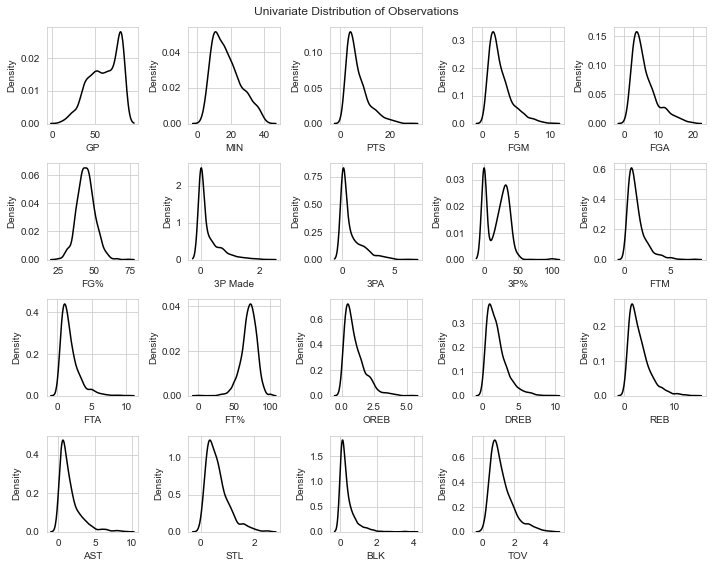

In [7]:
fig, axs = plt.subplots(4, 5, sharex=False, sharey=False, figsize=(10,8))
axs = axs.ravel()  # To get a flattened array

for i, c in enumerate(num_cols):
    sns.distplot(df[c], hist=False, ax=axs[i])
    
fig.delaxes(axs[-1])  # Remove empty figure
fig.suptitle('Univariate Distribution of Observations')
plt.tight_layout()
plt.show()

### 2.2.2 Boxplots to explore possible outliers

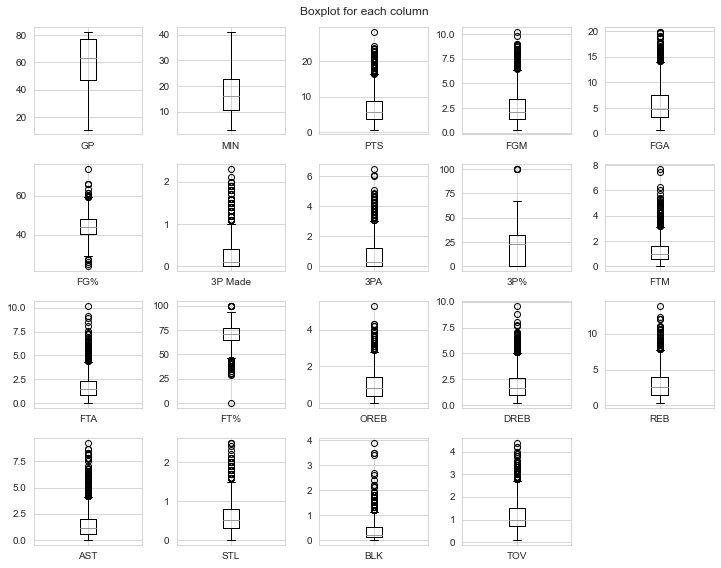

In [8]:
fig, axs = plt.subplots(4, 5, sharex=False, sharey=False, figsize=(10,8))
axs = axs.ravel()  # To get a flattened array

for i, c in enumerate(num_cols):
    df.boxplot(column=c, ax=axs[i])
    
fig.delaxes(axs[-1])  # Remove empty figure
fig.suptitle('Boxplot for each column')
plt.tight_layout()
plt.show()

### 2.2.4 Correlations

<AxesSubplot:>

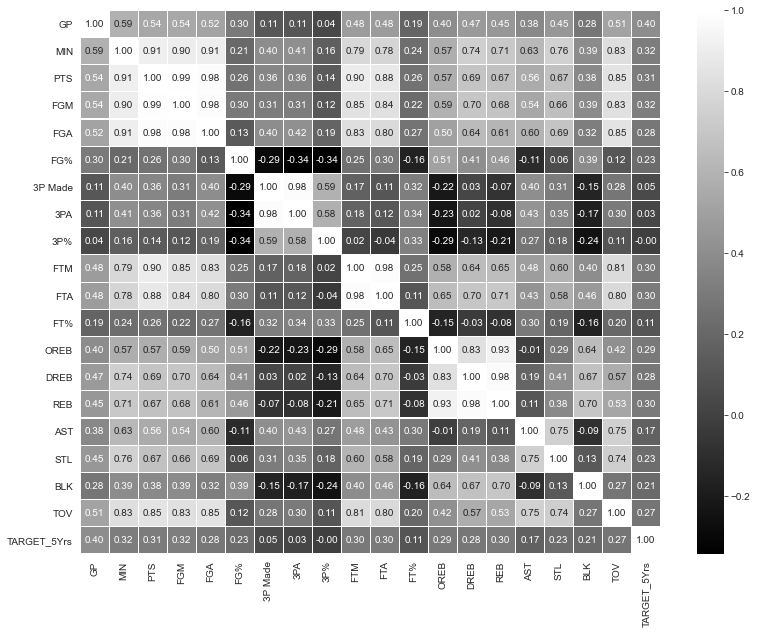

In [9]:
fig = plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),
            cmap='gray',
            linewidths=0.1,
            annot=True, 
            fmt='0.2f')

Looks like there are a couple of variables that are strongly correlated. In particular, 'MIN' which stands for minutes played have several correlations. Which it is logical, the more minutes a player play more assists, blocks or goals will have. 

For the target variable, looks like that there are not big correlations with the features

### 2.2.5 Target column

In [10]:
pcts = df['TARGET_5Yrs'].value_counts(normalize=True, sort=False).values
pcts

array([0.37985075, 0.62014925])

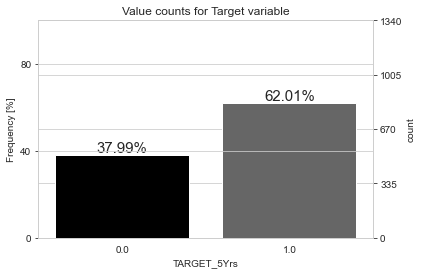

In [11]:
# src: https://stackoverflow.com/a/33259038
import matplotlib.ticker as ticker

plt.figure(figsize=(6, 4))

ax = sns.countplot(df['TARGET_5Yrs'])
# Make twin axis
ax2 = ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for i, p in enumerate(ax.patches):
    x=p.get_bbox().get_points()[:, 0]
    y=p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.2f}%'.format(pcts[i]*100), (x.mean(), y), 
            ha='center', va='bottom', size=15) # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(5))
# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,len(df))
# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(40))
plt.title('Value counts for Target variable');
plt.show()

Looks like we have a unbalanced target variable. We might need to take it into account for the modeling process

## 2.3 Missing values?

In [12]:
df.isnull().sum() / len(df) * 100

Name           0.0000
GP             0.0000
MIN            0.0000
PTS            2.6866
FGM            2.4627
FGA            2.9104
FG%            3.3582
3P Made        3.3582
3PA            2.5373
3P%            4.3284
FTM            2.6119
FTA            2.3134
FT%            3.4328
OREB           3.3582
DREB           2.4627
REB            3.2836
AST            2.9104
STL            3.2090
BLK            2.4627
TOV            3.0597
TARGET_5Yrs    0.0000
dtype: float64

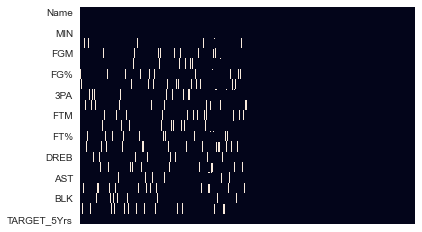

In [13]:
sns.heatmap(df.isnull().T, cbar=False, xticklabels=False);

There are missing values in almost every column, however the percentage with respect to total samples it's low. We can try two approaches and see which gives us a better result: 
* First, we can replace these missing values using the median of each column. 
* Second, we can drop the rows with missing values.

Another interesting behaviour is that the missing values are only present in the first half of the dataset.

## 2.4 Players names exploration

In [14]:
df['Name'].value_counts()[:30]

Charles Smith       9
Charles Jones       6
Dee Brown           4
Michael Smith       4
Mark Davis          4
Bobby Jones         2
Eddie Johnson       2
Mike Dunleavy       2
Carlos Rogers       2
Larry Drew          2
James Johnson       2
Walker Russell      2
Cory Alexander      2
Glenn Robinson      2
Mark Bryant         2
Tim Hardaway        2
Jeff Taylor         2
Reggie Williams     2
Glen Rice           2
Marcus Williams     2
Michael Anderson    2
Bob Martin          2
Chris Smith         2
Larry Johnson       2
David Lee           2
Gerald Henderson    2
Ken Johnson         2
Cedric Henderson    2
Jamie Feick         2
Jamal Crawford      1
Name: Name, dtype: int64

In [15]:
df.query("Name == 'Charles Smith'").T

,162,163,164,165,166,167,168,169,170
Name,Charles Smith,Charles Smith,Charles Smith,Charles Smith,Charles Smith,Charles Smith,Charles Smith,Charles Smith,Charles Smith
GP,60,60,60,71,71,71,34,34,34
MIN,8.7,8.7,8.7,30.4,30.4,30.4,8.6,8.6,8.6
PTS,NaN,2.9,2.9,16.3,16.3,16.3,3.5,3.5,3.5
FGM,1,1,1,6.1,6.1,6.1,1.4,1.4,1.4
FGA,2.2,2.2,NaN,12.4,12.4,12.4,3.7,3.7,3.7
FG%,44.4,44.4,44.4,49.5,49.5,49.5,NaN,39.2,39.2
3P Made,0,0,0,0,NaN,0,0.4,0.4,0.4
3PA,0.1,NaN,0.1,0,0,0,1.4,1.4,1.4
3P%,0,0,0,0,0,0,31.9,31.9,31.9


In [16]:
df.query("Name == 'Charles Jones'").T

,364,365,366,367,368,369
Name,Charles Jones,Charles Jones,Charles Jones,Charles Jones,Charles Jones,Charles Jones
GP,78,78,78,29,29,29
MIN,20.1,20.1,20.1,16.4,16.4,16.4
PTS,8.4,8.4,8.4,3.7,3.7,3.7
FGM,3,3,3,1.3,1.3,1.3
FGA,5.8,5.8,5.8,4.2,4.2,4.2
FG%,52,52,52,31.7,31.7,31.7
3P Made,0,0,0,0.7,0.7,0.7
3PA,NaN,0.1,0.1,2.1,NaN,2.1
3P%,0,0,0,31.1,31.1,31.1


In [17]:
df.query("Name == 'Gerald Henderson'").T

,732,733
Name,Gerald Henderson,Gerald Henderson
GP,43,43
MIN,8.3,8.3
PTS,2.6,2.6
FGM,0.9,0.9
FGA,2.4,2.4
FG%,35.6,35.6
3P Made,0.1,0.1
3PA,0.4,0.4
3P%,21.1,21.1


We've found that there are players that appear more than one time. In other words we have repeated data.

## 3. Data Pre processing

### 3.1 Imputing missing values 

Our first approach will be fill the missing values with the median of each column

In [18]:
df.fillna(value=df.median(), inplace=True)

In [19]:
df.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

### 3.2 Deleting repeated samples

In [20]:
df['Name'].value_counts()

Charles Smith     9
Charles Jones     6
Dee Brown         4
Michael Smith     4
Mark Davis        4
                 ..
Calvin Garrett    1
Brevin Knight     1
Casey Jacobsen    1
Chris Wilcox      1
Reece Gaines      1
Name: Name, Length: 1294, dtype: int64

We might need to perform a more deeper analysis to decide which instance to keep. But for now, we are going to take a simple approach and keep just the first instance of each repeated player

In [21]:
df.drop_duplicates('Name', keep='first', inplace=True)

In [22]:
df['Name'].value_counts()

Elden Campbell    1
Louis Orr         1
Willie Burton     1
Danny Fortson     1
Lou Roe           1
                 ..
Casey Jacobsen    1
Chris Wilcox      1
Larry Robinson    1
Mike Dunleavy     1
Reece Gaines      1
Name: Name, Length: 1294, dtype: int64

### 3.2 Dropping unuseful columns

* REB column is the sum of OREB and DREB, since there is repeated information, we can drop REB column.
* Name column doesn't look useful so we are going to drop it too.

In [23]:
df.drop(['Name','REB'], axis=1, inplace=True)
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,71.3,0.7,3.4,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,0.3,23.5,2.6,3.4,76.5,0.5,2.0,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.1,1.7,24.4,0.9,1.3,67.0,0.5,1.7,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,44.1,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,5.6,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,0.3,0.3,0.4,0.8,1.0


## 3. Modeling

### 3.1 Creating base models

First, we are going to test the following models without any hyperparameter tuning:
* DummyModel
* LightGBM 
* CatBoost
* Decision Tree Classifier
* Random Forest Classifier
* Naive Bayes
* Logistic Regression
* Support Vector Machine

In [24]:
# Models
import lightgbm as lgb
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [33]:
# Support libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

import plotly.graph_objects as go
import plotly.express as px

# Metrics
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# For Reproducibility
import os
import random
# Set seed for reproducability
SEED = 88
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
np.random.RandomState(SEED);